In [1]:
import pandas as pd
import numpy as np
import requests
pd.set_option('display.max_columns', 35)
from datetime import timedelta, datetime
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('climate_data_auston.csv')

In [3]:
df.shape

(4718, 34)

In [4]:
df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
4713,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-27,NaN,NaN,NaN,NaN,0.55,",,7,0730",0.0,",,7",0.0,",,7",58.0,",,7",39.0,",,7",42.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-28,NaN,NaN,NaN,NaN,0.00,",,7,0730",0.0,",,7",0.0,",,7",60.0,",,7",40.0,",,7",40.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4715,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-29,NaN,NaN,NaN,NaN,0.00,",,7,0730",0.0,",,7",0.0,",,7",67.0,",,7",34.0,",,7",34.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,7",0.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,7",0.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check for null values
df.isnull().sum()

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
DATE                  0
DAPR               4710
DAPR_ATTRIBUTES    4710
MDPR               4709
MDPR_ATTRIBUTES    4709
PRCP                105
PRCP_ATTRIBUTES     105
SNOW               1151
SNOW_ATTRIBUTES    1151
SNWD               1151
SNWD_ATTRIBUTES    1151
TMAX                 58
TMAX_ATTRIBUTES      58
TMIN                 54
TMIN_ATTRIBUTES      54
TOBS                 66
TOBS_ATTRIBUTES      66
WT01               4600
WT01_ATTRIBUTES    4600
WT03               4498
WT03_ATTRIBUTES    4498
WT04               4715
WT04_ATTRIBUTES    4715
WT05               4715
WT05_ATTRIBUTES    4715
WT06               4717
WT06_ATTRIBUTES    4717
WT11               4699
WT11_ATTRIBUTES    4699
dtype: int64

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [7]:
df = df.set_index('DATE')

In [8]:
df.head(2)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-02-01,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,NaN,NaN,NaN,NaN,0.0,",,0,",0.0,"P,,0",NaN,NaN,60.0,",,0",36.0,",,0",50.0,",,0,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-02,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,NaN,NaN,NaN,NaN,0.0,",,0,0700",0.0,"P,,0",0.0,"P,,0",62.0,",,0",39.0,",,0",41.0,",,0,0700",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
by_date = df.reset_index()


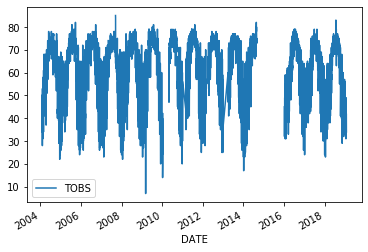

In [10]:
by_date.plot(x = 'DATE', y = 'TOBS' )

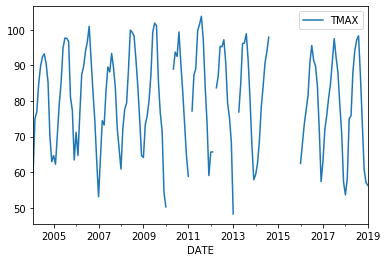

In [11]:
#resample monthly
df.resample('M').mean().reset_index().plot(x = 'DATE', y = "TMAX")

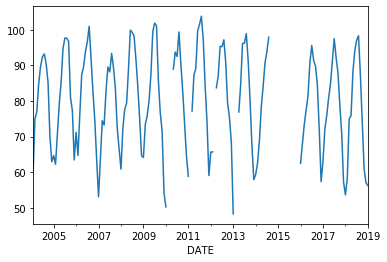

In [17]:
#resample start of month
df.TMAX.resample('MS').mean().plot()
plt.show()

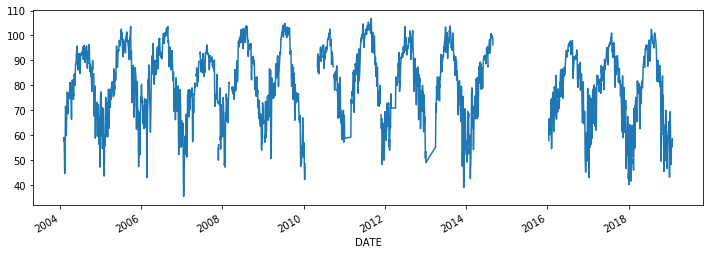

In [18]:
df.TMAX.rolling(5).mean().plot(figsize=(12, 4))

(74, 80)

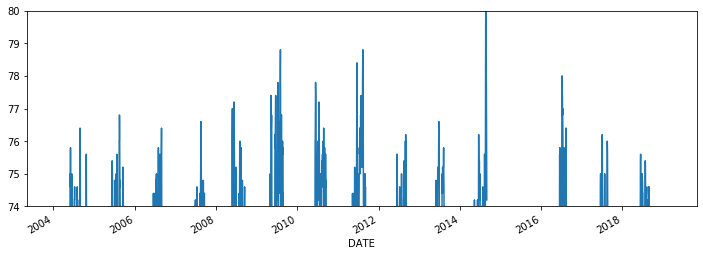

In [21]:
df.TOBS.rolling(5).mean().plot(figsize=(12, 4))
plt.ylim(74,80)

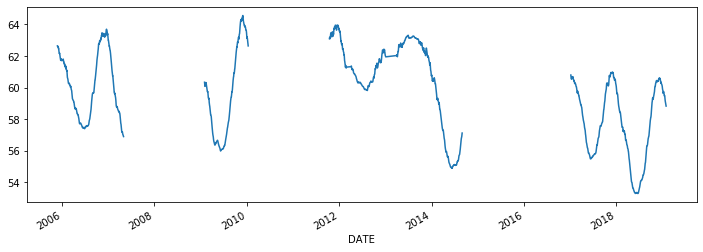

In [23]:
df.TOBS.rolling(300).mean().plot(figsize=(12, 4))
# plt.ylim(74,80)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4652 entries, 2004-02-01 to 2019-01-29
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          4652 non-null   object 
 1   NAME             4652 non-null   object 
 2   LATITUDE         4652 non-null   float64
 3   LONGITUDE        4652 non-null   float64
 4   ELEVATION        4652 non-null   float64
 5   DAPR             8 non-null      float64
 6   DAPR_ATTRIBUTES  8 non-null      object 
 7   MDPR             9 non-null      float64
 8   MDPR_ATTRIBUTES  9 non-null      object 
 9   PRCP             4581 non-null   float64
 10  PRCP_ATTRIBUTES  4581 non-null   object 
 11  SNOW             3501 non-null   float64
 12  SNOW_ATTRIBUTES  3501 non-null   object 
 13  SNWD             3501 non-null   float64
 14  SNWD_ATTRIBUTES  3501 non-null   object 
 15  TMAX             4645 non-null   float64
 16  TMAX_ATTRIBUTES  4645 non-null   object 
 

In [40]:
df1 = df[['TOBS']]

In [41]:
df1

,TOBS
DATE,
2004-02-01,50.0
2004-02-02,41.0
2004-02-03,34.0
2004-02-04,47.0
2004-02-05,44.0
...,...
2019-01-25,39.0
2019-01-26,39.0
2019-01-27,42.0


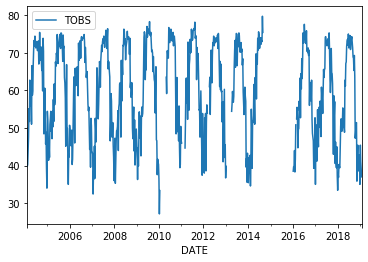

In [44]:
# df = df[df['TOBS'].notna()]
import statsmodels.api as sm

# decomposition = sm.tsa.seasonal_decompose(df1.resample('W').mean(), model='additive')
# fig = decomposition.plot()
# plt.show()

df1.resample('W').mean().plot()